In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
## Data Preprocessing
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
## Text Preprocessing
import re
import string

In [8]:
#convert uppercase to lowercase
data["tweet"]= data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [10]:
#remove Link
data["tweet"]= data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [11]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [12]:
#remove punctuations
string.punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [13]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [14]:
data["tweet"] = data["tweet"].str.replace(r"\d+", "",regex=True)
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove stopwords

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk

In [17]:
nltk.download("stopwords",download_dir = "../Static/Model")

[nltk_data] Downloading package stopwords to ../Static/Model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
with open("../Static/Model/corpora/stopwords/english","r") as file:
    sw = file.read().splitlines()

In [19]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [20]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [21]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [22]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [23]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [24]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [25]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


## Building Vocabulary

In [26]:
from collections import Counter
vocab = Counter()

In [27]:
vocab

Counter()

In [28]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [29]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [30]:
len(vocab)

15949

In [31]:
data.shape

(7920, 3)

In [32]:
# meke vocab eke size eka rows ganata wada wadi. ethkot overfitting wenwa. e nisa feature selection yodagnn wenwa

In [35]:
tokens = [key for key in vocab if vocab[key]>20]
len(tokens)

656

In [36]:
tokens

['android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batteri',
 'charg',
 'saturday',
 'summer',
 'like',
 'share',
 'want',

In [37]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding='utf-8')
    file.write(data)
    file.close()
save_vocabulary(tokens,'../Static/Model/vocabulary.txt')

### Divide Dataset

In [38]:
x= data['tweet']
y= data['label']

In [39]:
!pip install scikit-learn

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [41]:
x_train.shape


(6336,)

In [42]:
x_test.shape

(1584,)

In [43]:
y_train.shape

(6336,)

In [44]:
y_test.shape

(1584,)

### Vecterization


In [45]:
def vectorizer(ds, vocabulary):
    vectorized_list=[]

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype = np.float32)

    return vectorized_list_new 

In [46]:
 vectorized_x_train = vectorizer(x_train, tokens)

In [47]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 656), dtype=float32)

In [48]:
vectorized_x_test = vectorizer(x_test, tokens)

In [49]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 656), dtype=float32)

In [50]:
y_train

4298    1
2678    1
6815    0
2544    0
3770    0
       ..
3768    1
6615    0
4063    0
7869    0
6765    0
Name: label, Length: 6336, dtype: int64

In [51]:
y_train.value_counts() # meken apit penwa me dataset ek imbalance . ehem unam meke positive paththat wadi nisa model eke positive bawa wadi wenwa. e nisa me dataset ek balance karnn oni  

label
0    4733
1    1603
Name: count, dtype: int64

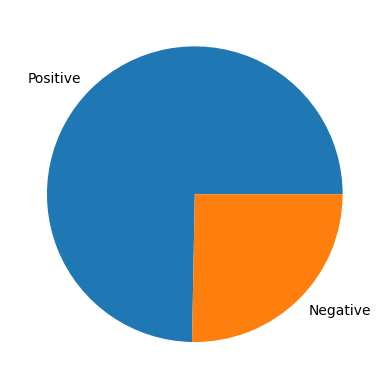

In [52]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive','Negative'])
plt.show()

In [53]:
!pip install imblearn

### Handel imbalance dataset

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9466, 656) (9466,)


In [55]:
 y_train_smote.value_counts()

label
1    4733
0    4733
Name: count, dtype: int64

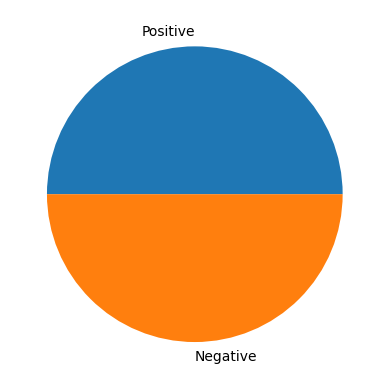

In [56]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive','Negative'])
plt.show()

## Model Training and Evaluation

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

   

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression

In [62]:
lr = LogisticRegression() 
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote) 
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred) 
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.922
	Precision = 0.893
	Recall = 0.957
	F1-Score = 0.924
Training Scores:
	Accuracy = 0.881
	Precision = 0.738
	Recall = 0.858
	F1-Score = 0.793


lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

### Multinomial NB

In [60]:
mn = MultinomialNB()
mn.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = mn.predict(vectorized_x_train_smote)
y_test_pred = mn.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.889
	Precision = 0.854
	Recall = 0.938
	F1-Score = 0.894
Training Scores:
	Accuracy = 0.867
	Precision = 0.693
	Recall = 0.901
	F1-Score = 0.783


### Decision Tree Classifier

In [61]:
Dstre = DecisionTreeClassifier()
Dstre.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = Dstre.predict(vectorized_x_train_smote)
y_test_pred = Dstre.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Training Scores:
	Accuracy = 0.806
	Precision = 0.649
	Recall = 0.593
	F1-Score = 0.62


### Random Forest Classifier

In [64]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 0.999
	Recall = 0.999
	F1-Score = 0.999
Training Scores:
	Accuracy = 0.869
	Precision = 0.762
	Recall = 0.74
	F1-Score = 0.751


### SVC

In [66]:
svc = SVC()
svc.fit(vectorized_x_train_smote,y_train_smote) 

y_train_pred = svc.predict(vectorized_x_train_smote)
y_test_pred = svc.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.968
	Precision = 0.946
	Recall = 0.993
	F1-Score = 0.969
Training Scores:
	Accuracy = 0.879
	Precision = 0.764
	Recall = 0.794
	F1-Score = 0.779


#### Save the best Model

In [67]:
import pickle

with open('../Static/Model/model.pickle','wb') as file:
    pickle.dump(lr,file)